In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [9]:
# Step 1: Data Collection
# Assuming you have a CSV file containing Google stock price data
data = pd.read_csv('Datasets/Google Stock.csv')

In [10]:
# Step 2: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [11]:
# Step 3: Model Architecture Selection
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
# Step 4: Model Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
93/93 [==============================] - 14s 80ms/step - loss: 0.0037
Epoch 2/5
93/93 [==============================] - 7s 76ms/step - loss: 0.0010
Epoch 3/5
93/93 [==============================] - 7s 75ms/step - loss: 0.0012
Epoch 4/5
93/93 [==============================] - 7s 75ms/step - loss: 8.0828e-04
Epoch 5/5
93/93 [==============================] - 7s 75ms/step - loss: 7.0364e-04


In [13]:
# Step 5: Model Evaluation
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

21/21 [==============================] - 1s 30ms/step


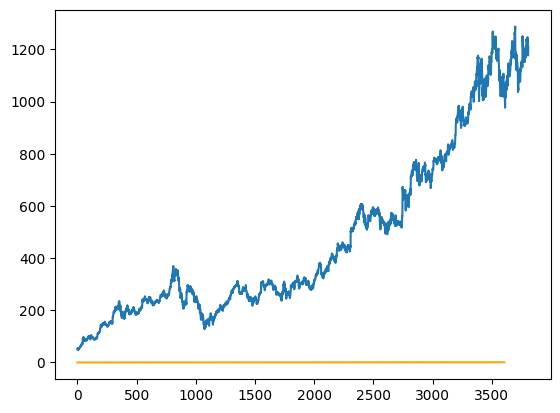

In [14]:
# Step 6: Prediction Visualization
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(np.concatenate([train_predict, test_predict]), color='orange')
plt.show()